# Quantum Teleportation

## We'll teleport state |1> from qubit 0 to qubit 2.

In [1]:
from qiskit import *

In [2]:
# building a circuit with 3 quantum bits and 3 classical bits.

circuit = QuantumCircuit(3, 3) 
# QUBIT ORDERING
# q0 = State |psi> that we want to teleport
# q1 = one half of the Bell pair
# q2 = other half of the Bell pair, the destination of the teleportation


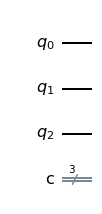

In [3]:
# displaying the circuit.

circuit.draw(output='mpl')

### Now we'll be teleporting the state |1> from q0 to q2, using q1 as a resource. 

In [4]:
# to get q0 to state |1> we will apply NOT gate i.e. X gate in Qiskit.

circuit.x(0)
circuit.barrier()

* a barrier is placed for better reading. It also tells the transpiler not to optimize our Quantum Circuit. Transpiler is a kind of compiler to transform our Quantum Circuit to an optimized Quantum Circuit for better execution in Quantum Computer).

* “Transpilation is the process where a quantum circuit is translated into a new quantum circuit that performs the same task but is restructured to be compatible with the physical layout of a particular quantum system (quantum computer) and, where possible, optimize its performance”.

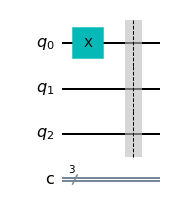

In [5]:
circuit.draw(output='mpl')

## Teleportation Protocol code -

### Now we create Entanglements.

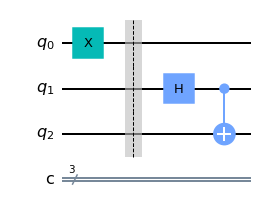

In [6]:
# now we'll create entanglement between q1 and q2.

circuit.h(1)
circuit.cx(1, 2)
circuit.draw(output='mpl')

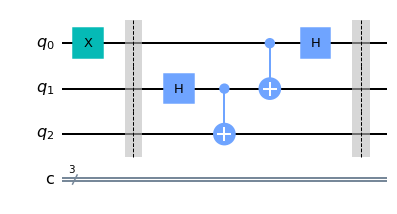

In [7]:
# now applying CNOT gate on q0 and q1, and applying a HADAMARD gate on q0.
# between the state to teleport (qubit 0) and her half of the Bell pair (qubit 1)

circuit.cx(0, 1)
circuit.h(0)
circuit.barrier()
circuit.draw(output='mpl')

### Now, we do the quantum measurement on the first 2 qubits: q0 and q1, then store the measurements to classical registers c0 and c1 respectively.

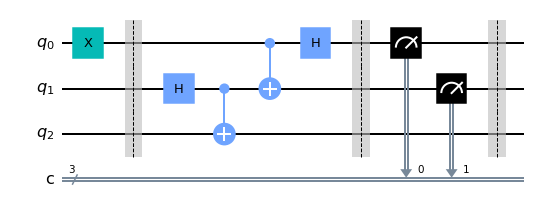

In [8]:
circuit.measure([0,1], [0,1])
circuit.barrier()
circuit.draw(output='mpl')

### Now we apply a CX-gate between q1 and q2 (q1 as the controlled qubit, q2 as the target qubit), followed by CZ-gate between q0 and q2 (q0 as the controlled qubit, q2 as the target qubit).

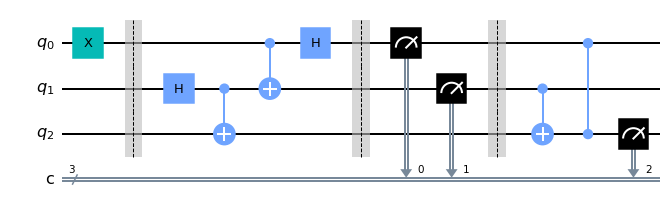

In [9]:
circuit.cx(1, 2)
circuit.cz(0, 2)

# getting result of measuring qubit2 and store in cbit2. 
circuit.measure(2, 2)

circuit.draw(output='mpl')

## Now we should always get state |1> on q2, since we teleported that state from q0.

### Simulator result -

In [10]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=4000).result()
counts = result.get_counts()

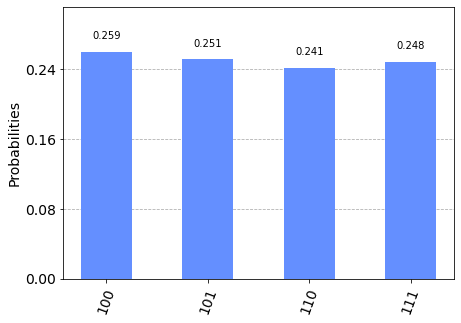

In [11]:
from qiskit.tools.visualization import plot_histogram

plot_histogram(counts)

To understand the results:

* these results are read in such a way that values in x-axis are cbit_2, cbit_1 and cbit_0. So, in :
    * 100 - cbit_2 = 1, cbit_1 = 0, cbit_0 = 0.
    * 101 - cbit_2 = 1, cbit_1 = 0, cbit_0 = 1.
    * 110 - cbit_2 = 1, cbit_1 = 1, cbit_0 = 0.
    * 111 - cbit_2 = 1, cbit_1 = 1, cbit_0 = 1.

* So, the first bit (or msb) of the values in the x-axis tells us that qubit_2 always has the bit state |1>.

## The result here signifies that we've taken the state in q0 and teleported it to the state in q2. The key element of the circuit, is that there's entanglement here, which allows us to take these two qubits far apart from each other, and so what this allows us to do is transfer quantum information over long distances.

### Quantum Computer result -

Job Status: job has successfully run
{'100': 1037, '111': 992, '101': 1005, '110': 966}


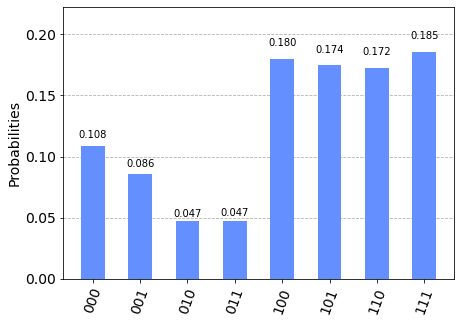

In [12]:
from qiskit.tools.monitor import job_monitor

# to save IBMQ account credentials on local machine.
#IBMQ.save_account('')   # insert API key and run only once.

# load saved credential to access IBM Quantum Computer on IBM Cloud
IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_belem')

# submit & monitor our quantum circuit to IBM backend real quantum computer
job = execute(circuit, backend = qcomp, shots = 4000)
job_monitor(job)

# inspect the result
result = job.result()

# the counts generate results with all qbit 2 = |1> (qubit sequence: q2 q1 q2), so results on 100, 101, 110 and 111
print(counts)
plot_histogram(result.get_counts(circuit))

### From the above graph it can be seen the state |1> is teleported from q0 to q2, as majority of the predictions are starting from 1 in the x-axis. And the values starting from 0 is due to the noise.